# CP6

## Machine Learning - Previsão de Churn

Nessa CP, seu objetivo é Desenvolver um modelo de classificação que identifique clientes propensos a cancelar o serviço (churn) a partir do Dataset customer_churn.csv. A análise de churn é essencial para empresas que buscam compreender e prever quais clientes têm maior probabilidade de deixar o serviço, permitindo que ações preventivas sejam tomadas.

<b>O que é churn?</b> <br/>

Churn ocorre quando um cliente decide interromper a assinatura ou relação com um serviço ou empresa. Na prática, o churn representa a perda de clientes e é um indicador importante para a saúde financeira e satisfação do cliente em relação aos serviços prestados.

<b>Dataset e Colunas</b> <br/>

O dataset contém informações de clientes que podem ajudar a identificar padrões que levam ao churn. Abaixo estão as descrições das colunas que você usará para construir o modelo:

- **CustomerID**: Identificação única de cada cliente.
- **Age**: Idade do cliente.
Gender: Gênero do cliente, podendo ser 'Male' (masculino) ou 'Female' (feminino).
- **Tenure**: Tempo (em meses) que o cliente permanece com o serviço.
- **Usage Frequency**: Frequência de uso do serviço pelo cliente (média de interações ou utilização mensal).
- **Support Calls**: Quantidade de ligações feitas pelo cliente ao suporte.
- **Payment Delay**: Atraso médio de pagamento (em dias) do cliente.
- **Subscription Type**: Tipo de assinatura do cliente (ex: Basic, Standard, Premium).
- **Contract Length**: Duração do contrato do cliente, que pode ser 'Monthly', - 'Quarterly' (trimestral) ou 'Annual' (anual).
- **Total Spend**: Total gasto pelo cliente durante o período de assinatura.
- **Last Interaction**: Número de dias desde a última interação do cliente com o serviço.
- **Churn**: Indica se o cliente realizou o churn, onde 1 significa que o cliente cancelou o serviço e 0 significa que o cliente permaneceu. (Essa é a nossa variável alvo, em cima dela que vamos desenvolver o nosso modelo).

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [122]:
df = pd.read_csv('customer_churn.csv')

In [123]:
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


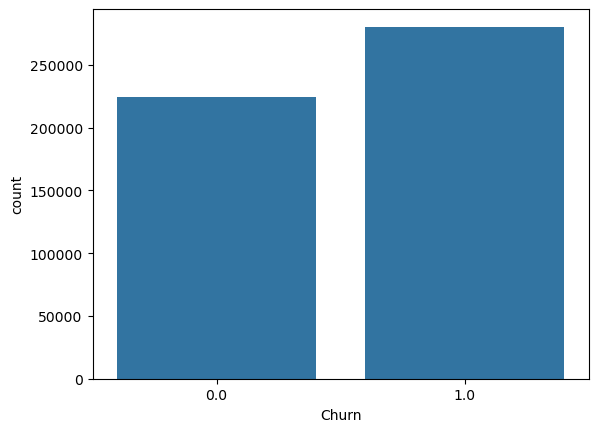

In [125]:
sns.countplot(x='Churn', data=df)
plt.show()

In [126]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Subscription Type', 'Contract Length'], drop_first=True)


In [127]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,1.0,22.0,0,25.0,14.0,4.0,27.0,598.0,9.0,1.0,False,False,True,False
1,2.0,41.0,0,28.0,28.0,7.0,13.0,584.0,20.0,0.0,False,True,True,False
2,3.0,47.0,1,27.0,10.0,2.0,29.0,757.0,21.0,0.0,True,False,False,False
3,4.0,35.0,1,9.0,12.0,5.0,17.0,232.0,18.0,0.0,True,False,False,True
4,5.0,53.0,0,58.0,24.0,9.0,2.0,533.0,18.0,0.0,False,True,False,False


In [128]:
print("Valores ausentes em 'Churn':", df['Churn'].isna().sum())

Valores ausentes em 'Churn': 1


In [129]:
# Remove as linhas onde 'Churn' é NaN
df = df.dropna(subset=['Churn'])

In [130]:
# Separando as features (X) e o target (y)
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

# Escalamento
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [133]:
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9356703153144237
[[38668  6418]
 [   82 55874]]
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     45086
         1.0       0.90      1.00      0.95     55956

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.93    101042



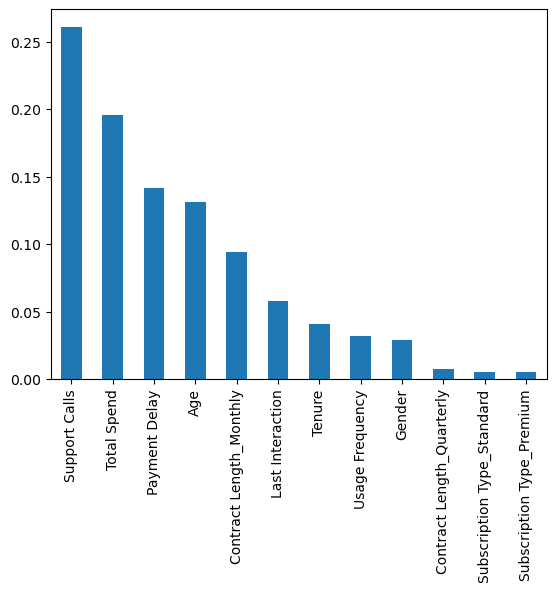

In [134]:
# Importância das features
feature_importances = pd.Series(model.feature_importances_, index=df.columns.drop(['CustomerID', 'Churn']))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()


### Em geral, parece que os maiores motivos para churn são a quantidade de Support Calls (indicando que se houver o problema com o serviço, ao ponto do cliente ter que ligar para o suporte, é um grando motivo para churn); 

o Total gasto e Payment Delay: pode indicar a situação financeira atual da pessoa, se o payment delay for muito alto, consistentemente, pode indicar que o cliente está numa situação inapta de pagar por um serviço por um longo período de tempo. 

O churn crescendo com Age pode indicar que pessoas com idade mais elevadas não estão interessadas no serviço, e ou não são o público alvo do mesmo.


#### O modelo também aparenta ter overfitting...

Talvez pelo número de amostras, talvez pelo modelo ser muito inteligente, pouca diversidade nas samples ou colunas irrelevantes.